In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchaudio

import sys
sys.path.append("./src")
from utils import wav2mel, draw_mel0

In [8]:
track_path = "data/rtMRI/F_18_Sacramento_sub047/tracks/usc_vtsf_F_18_Sacramento_rt_grandfather_r1s1_track.npy"
wav_path = "data/rtMRI/F_18_Sacramento_sub047/wav/usc_vtsf_F_18_Sacramento_rt_grandfather_r1s1.wav"

In [9]:
import IPython.display as ipd
ipd.Audio(wav_path) # load a local WAV file

In [10]:
ema_data = torch.FloatTensor(np.load(track_path))  #[T, 340]
ema_data = ema_data.transpose(-1, -2) #[340, T]
T_ema = ema_data.shape[1]
ema_data_delta = ema_data[:,1:] - ema_data[:,:T_ema-1] #[340, T-1]
ema_data_delta_energy = (ema_data_delta ** 2).sum(dim=0) #[T-1]

"you wish to know all about my grandfather 
well he is nearly ninety three years old and yet  \
he still thinks as swiftly as ever \
he dresses himself in an old br black frock coat usually several buttons missing \
a long beard clings to his chin giving those who observe him a pronounced feeling of utmost respect \
when he speaks his voice is just a bit cracked and quivers a bit"

In [11]:
wav, sr = torchaudio.load(wav_path)
print(sr)

20000


In [12]:
mel = wav2mel(wav)

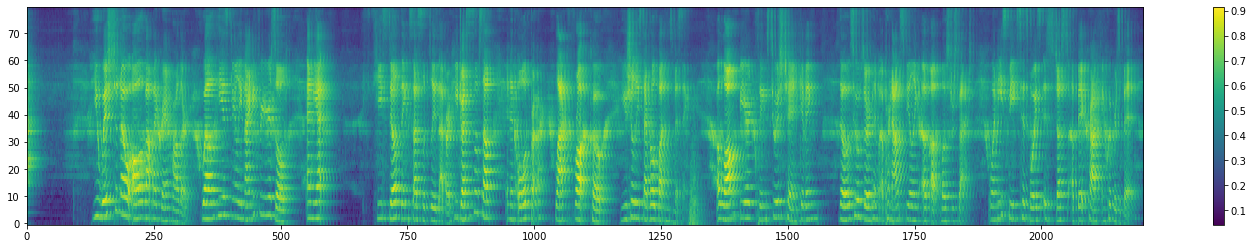

In [13]:
fig, ax = plt.subplots(figsize=(25, 4)) #hop size = 241
im = ax.imshow(mel.transpose(-1,-2), aspect="auto", origin="lower",
               interpolation='none')
plt.colorbar(im, ax=ax)
plt.xticks()
plt.yticks()
plt.xlim(0, 2200)
fig.canvas.draw()

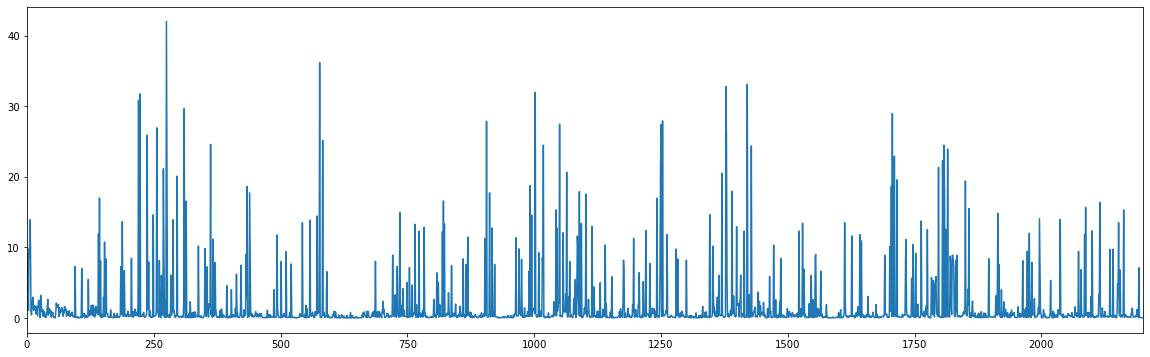

In [14]:
x_test = np.arange(0,T_ema-1)
plt.figure(figsize=(20, 6))
#plt.plot(x_test[:T_ema//3], ema_data_delta_energy[:T_ema//3])
plt.plot(x_test[:T_ema], ema_data_delta_energy[:T_ema])
plt.xticks()
plt.yticks()
plt.xlim(0,2200)
plt.savefig("rr.png")

In [15]:
import IPython.display as ipd
ipd.Audio(wav_path) # load a local WAV file

# you wish to know all about my grandfather well he is nearly ninety three years old and yet

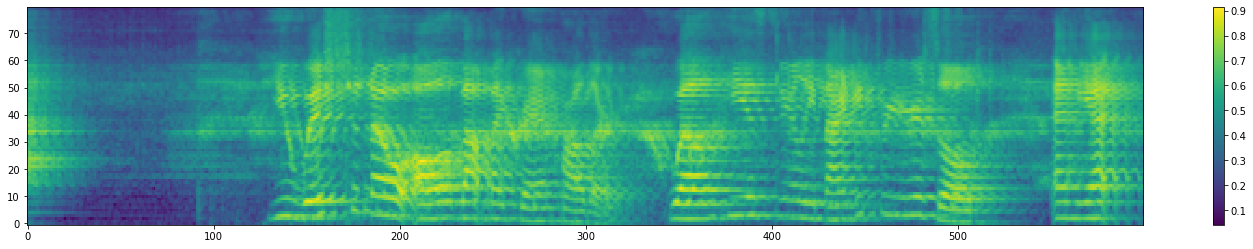

In [16]:
fig, ax = plt.subplots(figsize=(25, 4))
im = ax.imshow(mel.transpose(-1,-2)[:,:600], aspect="auto", origin="lower",
               interpolation='none')
plt.colorbar(im, ax=ax)
plt.xticks()
plt.yticks()
fig.canvas.draw()

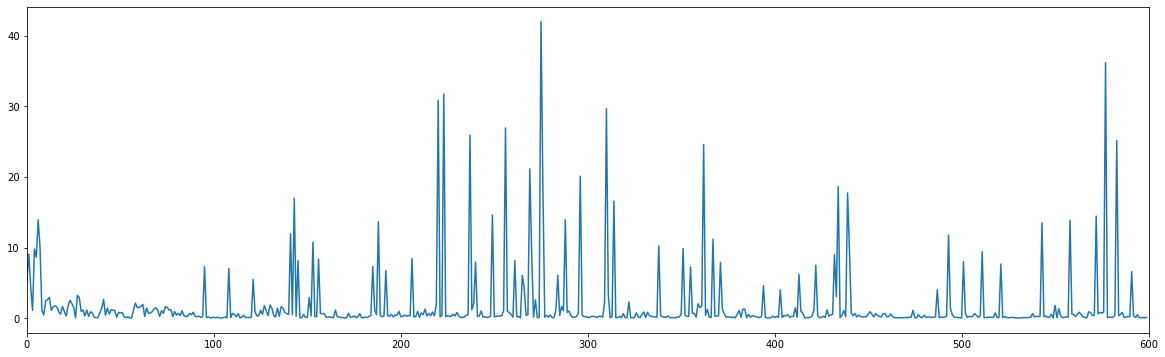

In [17]:
x_test = np.arange(T_ema-1)
plt.figure(figsize=(20.1, 6))
#plt.plot(x_test[:T_ema//3], ema_data_delta_energy[:T_ema//3])
plt.plot(x_test[:600], ema_data_delta_energy[:600])
plt.xticks()
plt.yticks()
plt.xlim(0,600)
plt.savefig("rr.png")

In [18]:
# from torchaudio.functional import lowpass_biquad

# plt.figure(figsize=(20, 6))
# y = lowpass_biquad(ema_data_delta_energy, sample_rate=83, cutoff_freq=100, Q=0.7)
# plt.plot(x_test[:600], y[:600])
# plt.xticks()
# plt.yticks()
# plt.xlim(0,600)

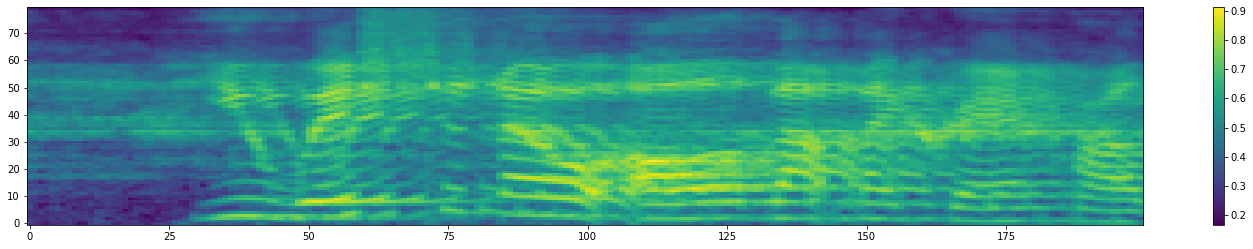

In [19]:
fig, ax = plt.subplots(figsize=(25, 4))
im = ax.imshow(mel.transpose(-1,-2)[:,100:300], aspect="auto", origin="lower",
               interpolation='none')
plt.colorbar(im, ax=ax)
plt.xticks()
plt.yticks()
fig.canvas.draw()

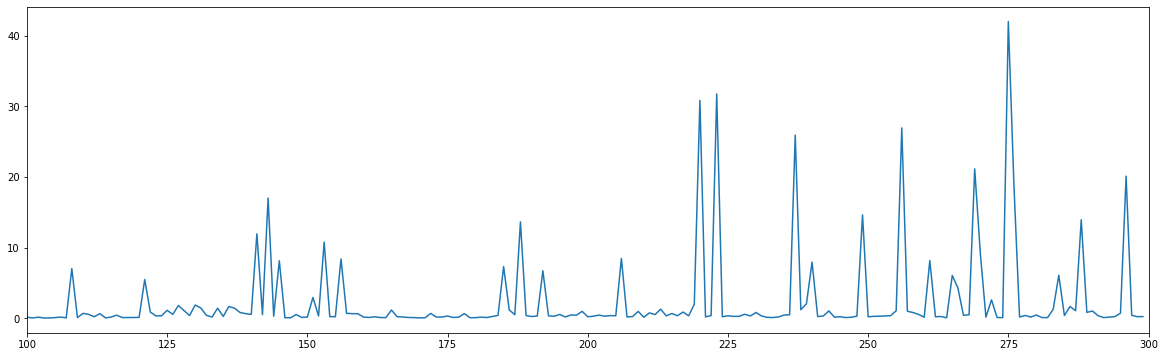

In [20]:
x_test = np.arange(T_ema-1)
plt.figure(figsize=(20.1, 6))
#plt.plot(x_test[:T_ema//3], ema_data_delta_energy[:T_ema//3])
plt.plot(x_test[100:300], ema_data_delta_energy[100:300])
plt.xticks()
plt.yticks()
plt.xlim(100,300)
plt.savefig("rr.png")

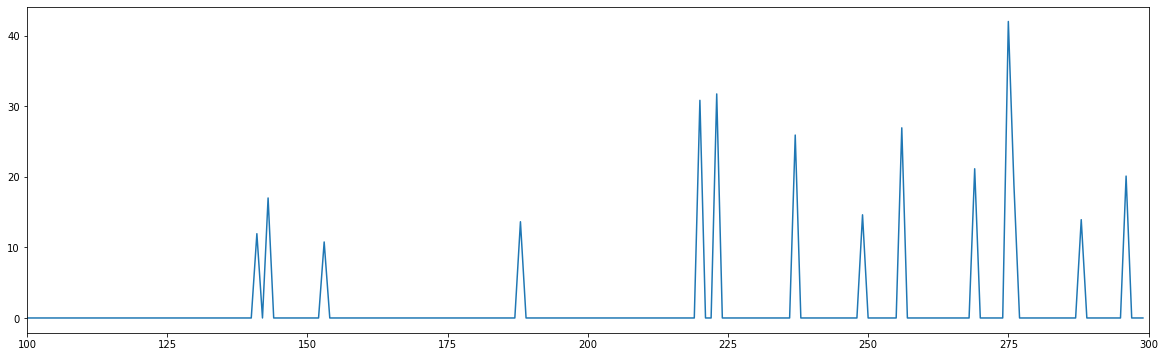

In [21]:
test_arr = ema_data_delta_energy[100:300].clone()
for i in range(len(test_arr)):
    if test_arr[i] < 10:
        test_arr[i] = 0

x_test = np.arange(T_ema-1)
plt.figure(figsize=(20.1, 6))
#plt.plot(x_test[:T_ema//3], ema_data_delta_energy[:T_ema//3])
plt.plot(x_test[100:300], test_arr)
plt.xticks()
plt.yticks()
plt.xlim(100,300)
plt.savefig("rr.png")

In [30]:
######################################################## Find Peak ##########################################################
test_arr2 = test_arr.clone()
peak_indices = []
peak_indices_set = set()
win_size = 15
h_win_size = (15 - 1) // 2


###############################################    Locate Peak Indices    ###########################################
for i in range(len(test_arr2)):
    if i > 1 and i < len(test_arr2) - 1:
        if test_arr2[i] > test_arr2[i + 1] and test_arr2[i] > test_arr2[i - 1]:
            peak_indices.append(i)
            peak_indices_set.add(i)
            
peak_indices_sparse = []
peak_indices_sparse_set = set()

for index in peak_indices:
    flag = False
    if index + h_win_size <= len(test_arr2) -1 and index - h_win_size >= 0:
        for j in range(index - h_win_size, index + h_win_size + 1):
            if j == index:
                continue
            if j in peak_indices_set:
                flag = True
                break
        if not flag:
            peak_indices_sparse.append(index)
            peak_indices_sparse_set.add(index)

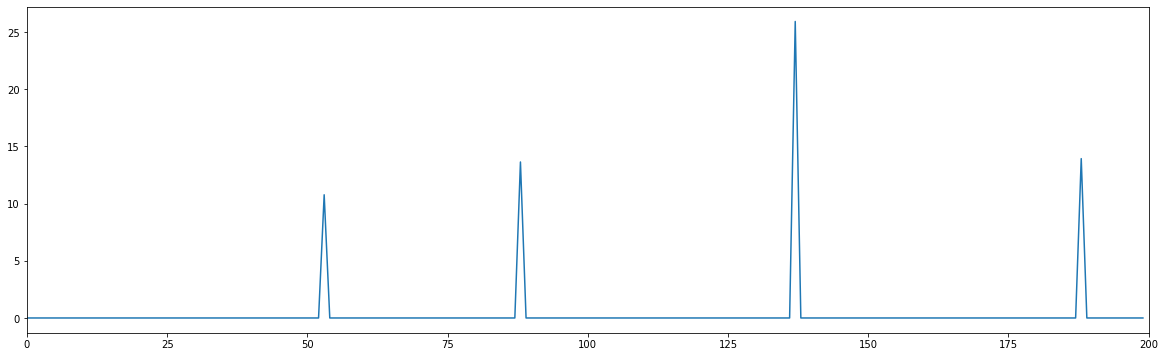

In [32]:
y = test_arr2.clone()
x = np.arange(len(y))
for i in range(len(y)):
    if i not in peak_indices_sparse_set:
        y[i] = 0
        
plt.figure(figsize=(20.1, 6))
plt.plot(x, y)
plt.xticks()
plt.yticks()
plt.xlim(0,200)
plt.savefig("rr.png")

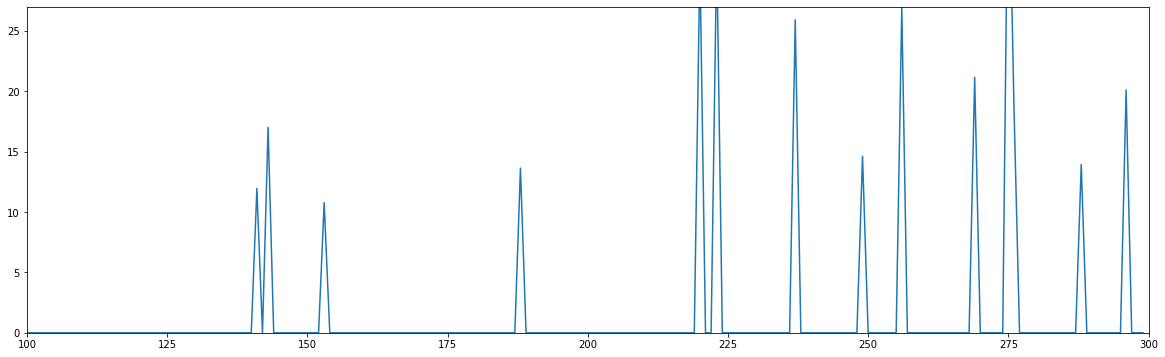

In [36]:
test_arr = ema_data_delta_energy[100:300].clone()
for i in range(len(test_arr)):
    if test_arr[i] < 10:
        test_arr[i] = 0

x_test = np.arange(T_ema-1)
plt.figure(figsize=(20.1, 6))
#plt.plot(x_test[:T_ema//3], ema_data_delta_energy[:T_ema//3])
plt.plot(x_test[100:300], test_arr)
plt.xticks()
plt.yticks()
plt.xlim(100,300)
plt.ylim(0,27)
plt.savefig("rr.png")